## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 10: Review
## Due 15 December, 2019 at 11:59 PM
### Kevin Egedy

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable code, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas. 
- Comment your code as necessary, with a description of what each function does and all major steps.
- Label plots axes, use legends, and use plot titles. 

# Differential Equations for Neural Networks

The computational neural networks we have been studying are quite far from what is happening in biology. A slightly more realistic model is to admit that each neuron $i$ in a network has a time varying firing rate $x_i$, for $i$ equal $1$ to $n$. We let $W \in \mathbb{R}^{n \times n}$ be weight matrix, and $b \in \mathbb{R}^n$. The dynamics of such a neural network are

$$
\dot x_i = g \left (
\sum_{j=1}^n w_{i,j} x_j + b_i
\right )
$$

where is the nonlinearity

$$
g(x) = \frac{1}{1+e^{-x}} - \frac{1}{2} .
$$

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 

In [1]:
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import networkx as nx
import random
import scipy
import scipy.ndimage
import scipy.integrate as spi
%matplotlib inline

http://genomics.princeton.edu/rajan/downloads/papers/Rajan2005.pdf

In [2]:
# g(x) = {1}/{1+e^{-x}} - 1/2
def g(x):
    return 1/(1+np.exp(-x))-(1/2)

In [20]:
# neurons
N = 3 
# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])
# bias
b = np.zeros(N)

def generate_initial_cond(N):
    # time varying firing rate 𝑥_j
    return np.random.uniform(-2,2,size=N)

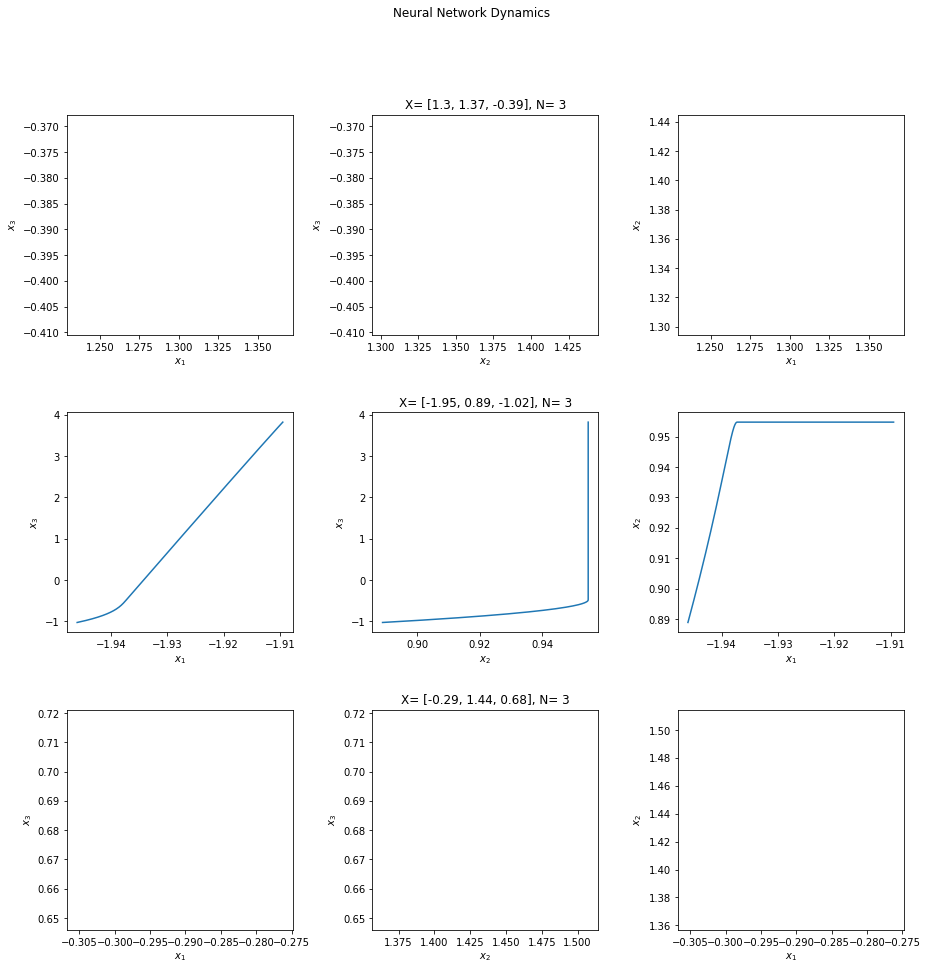

In [21]:
# simulate different number of neurons
# The size of the array returned by func must match the size of y0 (init)
def firing_rates(init,t,W,b,neurons):
    X = init
    N = int(neurons)
    X_rate = [0]*N
    for i in range(N):
        # dynamics        
        s = 0
        for j in range(N):
            s += W[i,j]*X[j]+b[i]
        X_rate[i] = g(s)
    return X_rate

t = np.linspace(0., 10, 6000)
fig,axs = plt.subplots(3,3,figsize=(15,15))
plt.suptitle("Neural Network Dynamics")
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)

############################
X = generate_initial_cond(N)
state0 = spi.odeint(firing_rates,X,t,args=(W,b,N))

X = [round(x,2) for x in X]
axs[0,0].plot(state0[:,0],state0[:,2],label="trajectory 1")
axs[0,0].set_xlabel("$x_1$")
axs[0,0].set_ylabel("$x_3$")

axs[0,1].plot(state0[:,1],state0[:,2],label="trajectory 1")
axs[0,1].set_xlabel("$x_2$")
axs[0,1].set_ylabel("$x_3$")
axs[0,1].set_title(f"X= {X}, N= {N}")

axs[0,2].plot(state0[:,0],state0[:,1],label="trajectory 1")
axs[0,2].set_xlabel("$x_1$")
axs[0,2].set_ylabel("$x_2$")

############################
X = generate_initial_cond(N)
state1 = spi.odeint(firing_rates,X,t,args=(W,b,N))

X = [round(x,2) for x in X]
axs[1,0].plot(state1[:,0],state1[:,2],label="trajectory 1")
axs[1,0].set_xlabel("$x_1$")
axs[1,0].set_ylabel("$x_3$")

axs[1,1].plot(state1[:,1],state1[:,2],label="trajectory 1")
axs[1,1].set_xlabel("$x_2$")
axs[1,1].set_ylabel("$x_3$")
axs[1,1].set_title(f"X= {X}, N= {N}")

axs[1,2].plot(state1[:,0],state1[:,1],label="trajectory 1")
axs[1,2].set_xlabel("$x_1$")
axs[1,2].set_ylabel("$x_2$")

############################
X = generate_initial_cond(N)
state2 = spi.odeint(firing_rates,X,t,args=(W,b,N))

X = [round(x,2) for x in X]
axs[2,0].plot(state2[:,0],state2[:,2],label="trajectory 1")
axs[2,0].set_xlabel("$x_1$")
axs[2,0].set_ylabel("$x_3$")

axs[2,1].plot(state2[:,1],state2[:,2],label="trajectory 1")
axs[2,1].set_xlabel("$x_2$")
axs[2,1].set_ylabel("$x_3$")
axs[2,1].set_title(f"X= {X}, N= {N}")

axs[2,2].plot(state2[:,0],state2[:,1],label="trajectory 1")
axs[2,2].set_xlabel("$x_1$")
axs[2,2].set_ylabel("$x_2$")

plt.show();

X = [0.25, −1.42, −1.85]

# Exotic Behaviors

In 1963 Edward Lorenz was studying convection in weather systems. After simplifying his model he ended up with the system

\begin{eqnarray}
\dot x & = & \sigma (y-x) \\
\dot y & = & x(\rho-z) - y \\
\dot z & = & x y - \beta z .
\end{eqnarray}

Here, $x$ is the rate of convection, $y$ is the variation in temperature horizontally, and $z$ the variation of temperature vertically. 

In an attempt to understand what the system did, he made a plot of the dynamics.

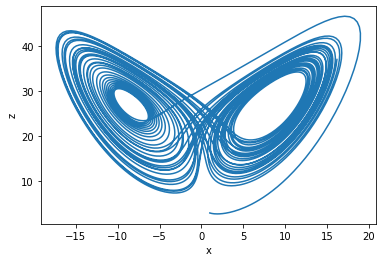

In [5]:
def f_lorenz(X,t):
    x,y,z = X
    a,r,b = 10, 28, 8/3
    return [
        a*(y-x),
        x*(r-z)-y,
        x*y - b*z
    ]

t = np.linspace(0., 40, 6000)
X = spi.odeint(f_lorenz,[1,2,3],t);

plt.plot(X[:,0],X[:,2],label="trajectory 1");
plt.xlabel("x")
plt.ylabel("z");

### 1. XNOR 

Recall the two layer network with two inputs and two hidden nodes corresponds to the equations below, where $g$ is the Rectified Linear Unit function. **By hand, find weights and biases so that this network computes the XNOR function** (instead of XOR as shown in class. 

$$
\begin{pmatrix} x_3 \\ x_4 \end{pmatrix} = 
g \left ( 
    \begin{pmatrix}
      w_{13} & w_{23} \\
      w_{14} & w_{24}
    \end{pmatrix}
      \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} 
    + \begin{pmatrix}b_3 \\ b_4\end{pmatrix} 
\right )
$$

and

$$
x_5 = 
g \left ( 
      \begin{pmatrix} w_{35} & w_{45} \end{pmatrix}
      \begin{pmatrix} x_3 \\ x_4 \end{pmatrix} 
    + b_5 
\right )
$$

with 

$y = x_5$ being the output.

In [6]:
# Change All these PARAMETER values
# Hint: Possible values you should consider are combinations of -2, -1, 0, 1, 2

W = None
c = None
b = None
in1 = np.array([[0],[0]]) # 2x1 vector
in2 = np.array([[0],[1]])
in3 = np.array([[1],[0]])
in4 = np.array([[1],[1]])

while(1):
    w13,w23,w14,w24 = random.randint(-2,3),\
                        random.randint(-2,3),\
                        random.randint(-2,3),\
                        random.randint(-2,3)
    W = np.array([[w13,w23],
                  [w14,w24]])
    
    c = np.array([
        [random.randint(-2,3)],   # b3
        [random.randint(-2,3)]    # b4
    ])
    
    # b5 bias value, # Change this
    b = random.randint(-2,3)
    
    # 2nd layer weight vector: [w35, w45] # Change these
    w = np.array([[random.randint(-2,3)],[random.randint(-2,3)]])
    
    def g(x):
        '''A simple ReLU function'''
        return np.maximum(np.zeros_like(x), x) # np.maximum takes the elementwise maximum

    def f(ins):
        '''A simple neural network computation like in class'''
        return g(w.transpose() @ g(W @ ins + c) + b)

    # Truth table output
    output = f(in1).tolist()[0]+\
                f(in2).tolist()[0]+\
                f(in3).tolist()[0]+\
                f(in4).tolist()[0] 
    outputNP = np.array(output)
    while (np.max(outputNP)>1):
        outputNP = outputNP - 1
    if output == [1,0,0,1]:
        print('FOUND')
        print(W);print()
        print(c);print()
        print(b)
        break

FOUND
[[-2  3]
 [ 1 -1]]

[[-1]
 [ 0]]

1


In [7]:
# Use W,c,b found in while and compute network function
def f(ins,W,c,b):
    '''Computes Neural network with given W,c,b'''
    return g(w.transpose() @ g(W @ ins + c) + b)

f(in1,W,c,b),f(in2,W,c,b),f(in3,W,c,b),f(in4,W,c,b)

(array([[1]]), array([[0]]), array([[0]]), array([[1]]))

W = 
$\begin{bmatrix}
1  &-2 \\
-2 & 3
\end{bmatrix}$<br><br>

c = 
$\begin{bmatrix}
0 \\
-2
\end{bmatrix}$<br><br>

and $b = 1$.

/home/kegedy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/kegedy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


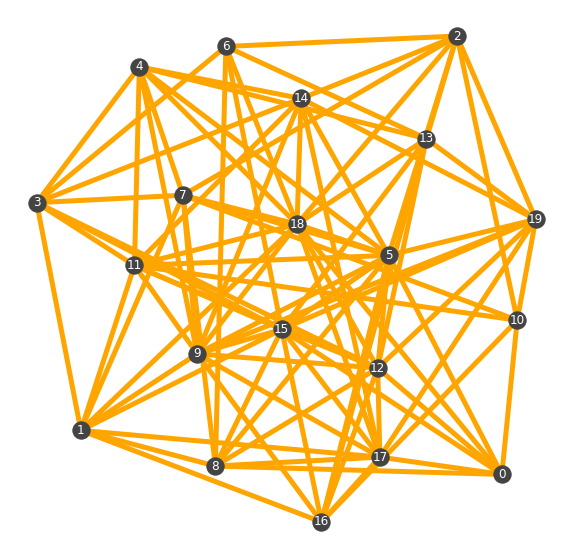

In [8]:
# Draw the graph with the circuit highlighted
n = 20
p = 0.5
RG = nx.fast_gnp_random_graph(n,p)

fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if RG.has_edge(u,v) else "gray" for u,v in RG.edges]
edge_widths = [5 if RG.has_edge(u,v) else 0.5 for u,v in RG.edges]

nx.draw(RG, 
        pos=nx.kamada_kawai_layout(RG), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)